# **<<< Only Problem 1 and 2 will be graded >>>**

## Problem 1 (sound)
Denoising time with FFT (DFT)

In [1]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 30.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

import librosa
import parselmouth

In [3]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h = np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

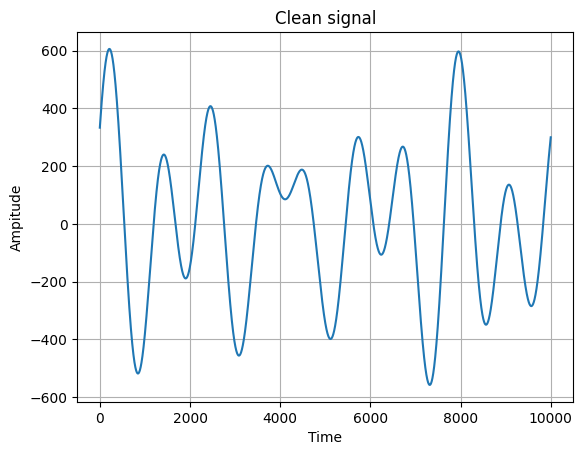

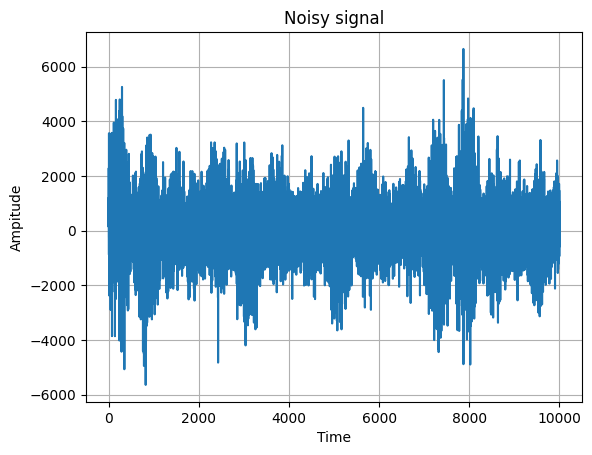

In [7]:
# TODO 1.1 : plot (1) clean signal and (2) noisy signal with label
plt.plot(t,h)
plt.xlabel("Time")
plt.ylabel("Ampitude")
plt.grid()
plt.title("Clean signal")
plt.show()

plt.plot(t,h_w_noise)
plt.xlabel("Time")
plt.ylabel("Ampitude")
plt.grid()
plt.title("Noisy signal")
plt.show()

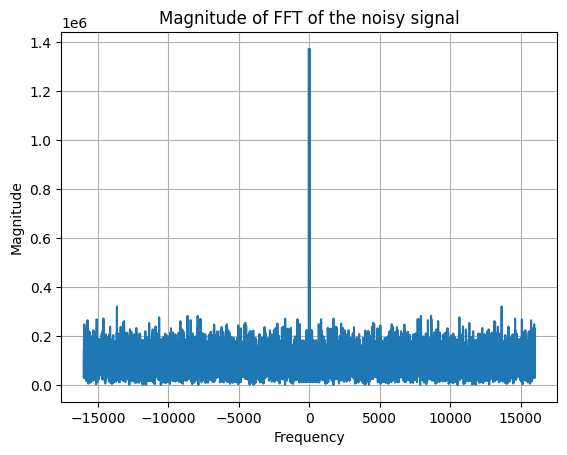

In [8]:
# TODO 1.2: plot magnitude of FFT of the noisy signal (freq sort form min--> max)
FFT = np.fft.fft(h_w_noise)
magnitude = np.abs(FFT)
freq = np.fft.fftfreq(N, 1/sampling_rate) # เอาความถี่มา N จุด โดย plot ห่างกันแต่ละจุดทุก 1/sampling rate
plt.plot(freq,magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid()
plt.title("Magnitude of FFT of the noisy signal")
plt.show()

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


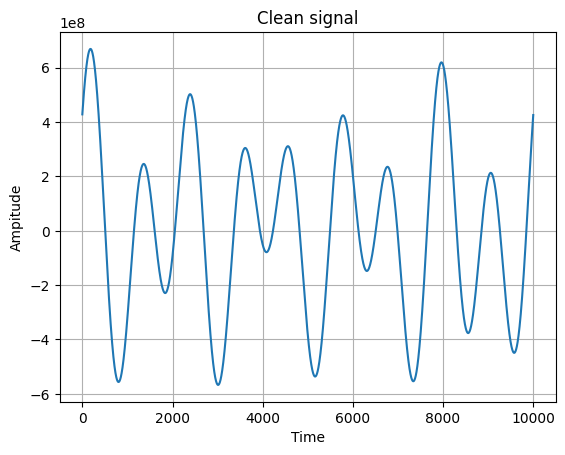

In [30]:
# TODO 1.3 : cleaning the noisy signal using magnitude of FFT
# จาก 1.2 จะเห็นว่าความถี่ต่ำจะมีค่าสูงทำให้เดาได้ว่าที่ความถี่อื่นๆคือnoise ดังนั้นเราจะลดอำนาจของความถี่อื่นๆในเชิงเวลาโดยการใช้ convolution
cleaningFFT = FFT.copy()
th = np.max(magnitude)*0.4
filterHW = magnitude.copy()
filterHW[magnitude < th] = 0
cleanFreq = cleaningFFT * filterHW
cleaningSignal = np.fft.ifft(cleanFreq)
plt.plot(t,cleaningSignal)
plt.xlabel("Time")
plt.ylabel("Ampitude")
plt.grid()
plt.title("Clean signal")
plt.show()

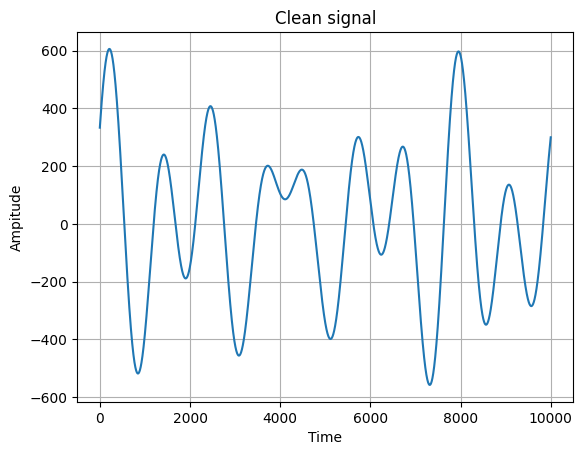

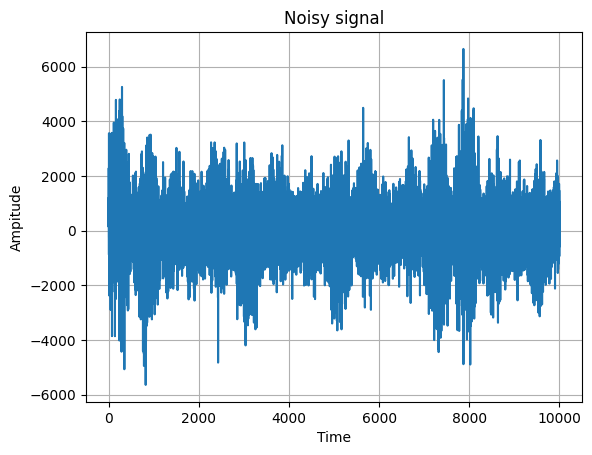

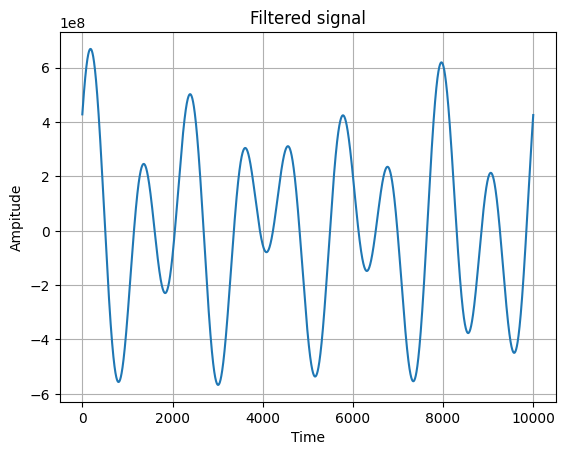

In [31]:
# TODO 1.4 : plot clean signal, noise signal and filtered signal (from your result in TODO 3.3) with label
plt.plot(t, h)
plt.xlabel("Time")
plt.ylabel("Ampitude")
plt.grid()
plt.title("Clean signal")
plt.show()
plt.plot(t, h_w_noise)
plt.xlabel("Time")
plt.ylabel("Ampitude")
plt.grid()
plt.title("Noisy signal")
plt.show()

plt.plot(t,cleaningSignal)
plt.xlabel("Time")
plt.ylabel("Ampitude")
plt.title("Filtered signal")
plt.grid()
plt.show()

In [32]:
# TODO 1.5 : export with IPython.display, listen to (1) original signal (2) signal with noise (3) signal after filtered
print("Original signal")
display(ipd.Audio(h, rate=sampling_rate))
print("Noise signal")
display(ipd.Audio(h_w_noise, rate=sampling_rate))
print("filterd signal")
display(ipd.Audio(cleaningSignal, rate=sampling_rate))

Original signal


Noise signal


filterd signal


In [38]:
# TODO 1.6 : Write to explain and analyze the results
#โจทย์ได้มีการสมมุติว่า มีสถานการให้เราทำการกรองสัญญาณ จาก สัญญาณที่มี noise (h_w_noise)
#โดยเมื่อเราหา DFT ของ signal ออกมาจะเห็นว่าที่ความถี่ต่ำ จะมีค่าสูงมาก และที่ความถี่อื่นๆมีค่าต่ำมากเมื่อเทียบกับที่ความถี่เท่ากับ 0
#ทำให้เราทำการ filter โดยการใช้หลักการที่ เราจะลดถอนอำนาจ ความถี่อื่นๆลง โดยการกำหนดว่าที่ 20% ของความถี่สูงสุดค่าใดที่น้อยกว่านี้ ถือว่าให้เป็น 0
# เพราะเมื่อเรา นำไปคูณกับ h_w_signal ที่อยู่ใน domain ความถี่จะได้ผลลัพธ์ ออกมาเป็น signal ที่กรองค่าที่ความถี่ต่ำกว่า 20% ออกไปให้เหลือ 0 ทำให้อำนาจของความถี่ที่มีค่าเท่ากับ 0 ไม่มีอำนาจใน domain เวลา
# จากนั้นทำการแปลง inverse dft จะได้เป็น signal ที่ผ่านการ convolution กับ filter มาซึ่งจะเห็นว่าเมื่อเรากรองค่าที่ความถี่ต่ำกว่า 20% ของความถี่สูงสุดออก จะได้ signal ที่เหมือนกับ clean signal ตั้งต้น
# จากผลการวิเคราะห์จะเห็นว่ายิ่งเราเพิ่มค่า % เพิ่มขึ้นไปจะยิ่งกรองสัญญาณที่มีค่าต่ำๆออกไป แต่ถ้าเรากำหนด % น้อยจะยิ่งเหลือ noise อยู่

## Problem 2 (image FFT)
Download a 1000 x 1000 image ("hamtaro.png") below

<a href="https://ibb.co/kHTjZbb"><img src="https://i.ibb.co/kHTjZbb/hamtaro.png" alt="hamtaro" border="0"></a>

[[112 113 113 ... 137 137 137]
 [113 113 113 ... 137 137 137]
 [113 114 114 ... 137 137 137]
 ...
 [171 171 171 ...  69  54  40]
 [171 171 171 ...  46  34  22]
 [171 170 170 ...  36  26  17]]


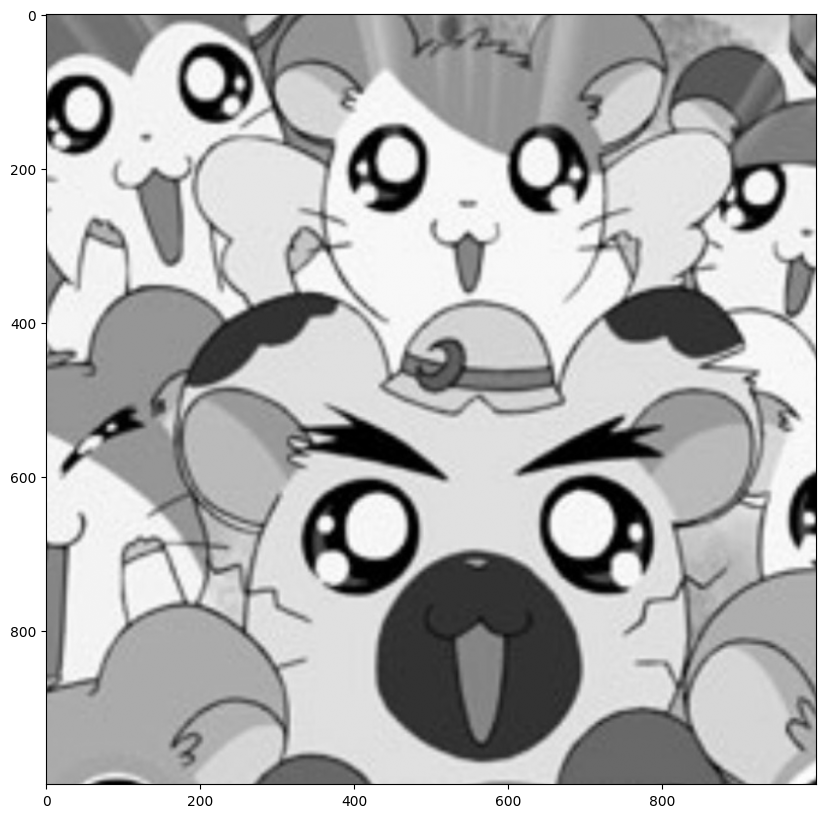

In [48]:
screen_shot = cv2.imread('hamtaro.png',0)
print(screen_shot)
plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

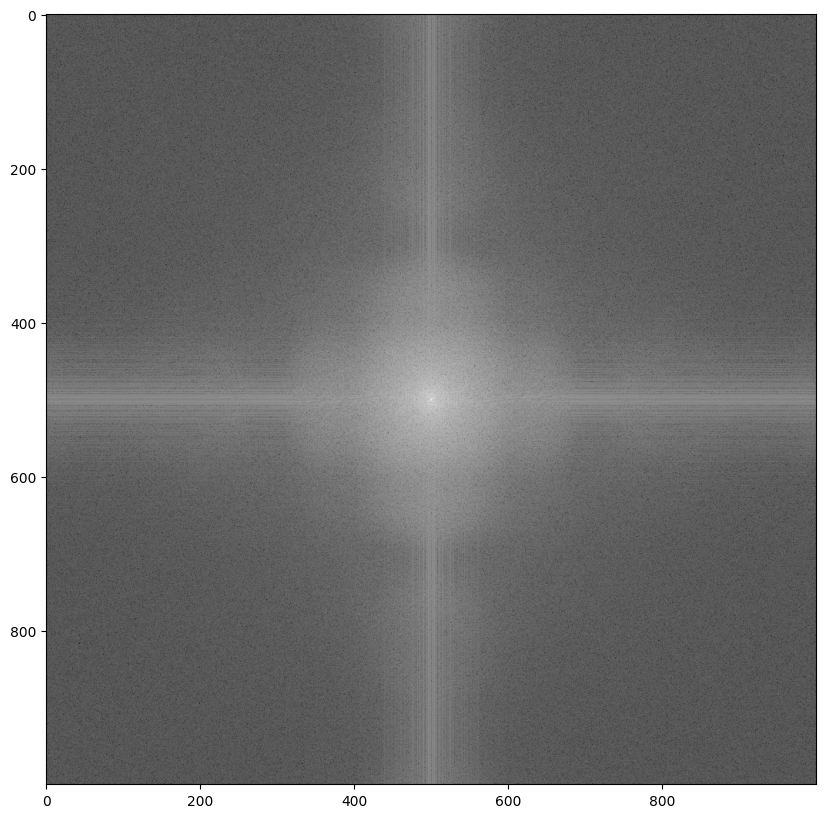

In [57]:
# Apply FFT to the given image
F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

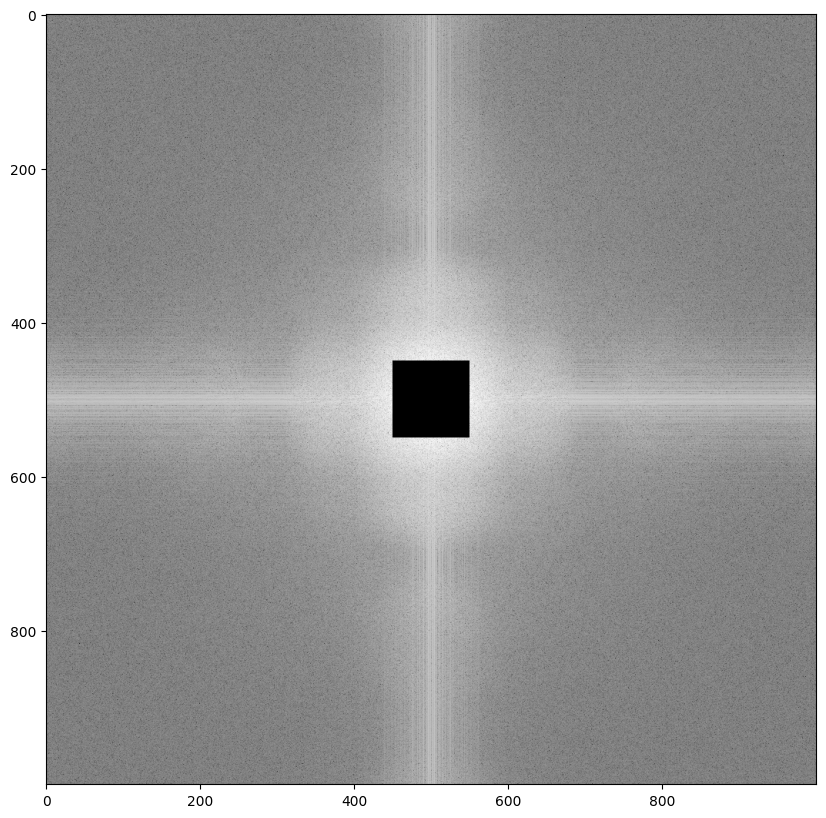

In [58]:
# TODO 2.1 : Implement an ideal high-pass filter with a box size of 100x100 pixels on the given image
n = 100
h = np.ones((1000,1000))
h[500-n//2:500+n//2, 500-n//2:500+n//2] = 0
F2_filtered = F2*h
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2_filtered))).astype(int), cmap=plt.cm.gray)
plt.show()

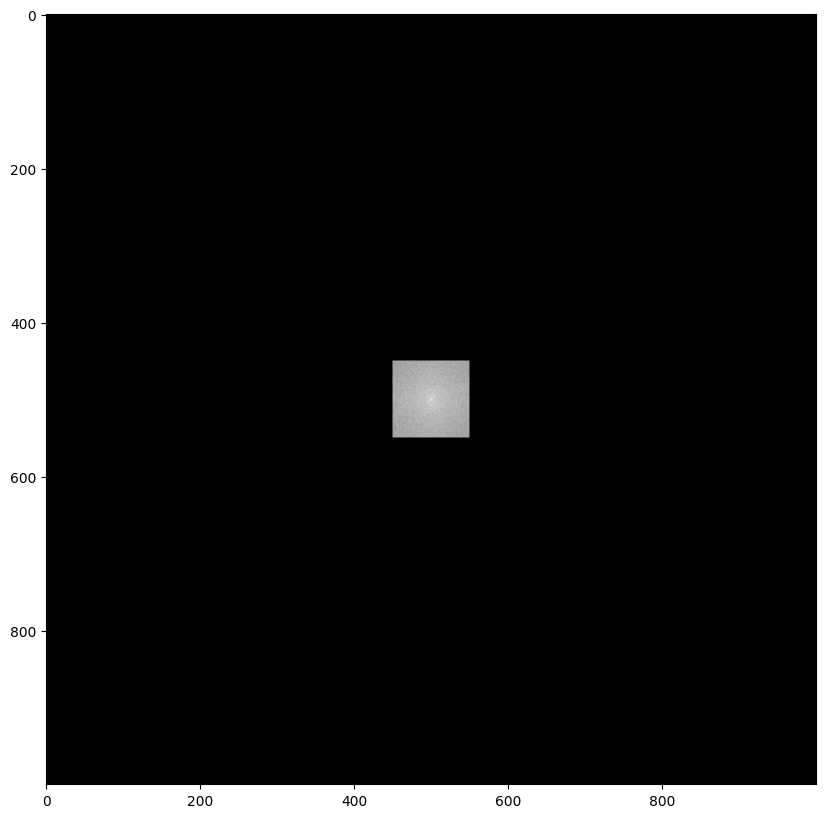

In [59]:
# TODO 2.2 : Implement an ideal low-pass filter with a box size of 100x100 pixels on the given image
h = np.zeros((1000,1000))
h[500-n//2:500+n//2, 500-n//2:500+n//2] = 1
F2_highpass = F2*h
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2_highpass))).astype(int), cmap=plt.cm.gray)
plt.show()


## Problem 3

A digital signal can be generated from sampling of an analog signal using a periodic impulse-train. Explain how you can reconstruct an analog signal from a digital signal and aliasing problem does not occur when $f_s \leq 2f_{max} $ using frequency analysis.

where $f_s$ is the sampling frequency and $f_{max} $ is the maximum frequency of the analog signal

HINT :  $ \mathscr{F} \left\{ \sum_{n=-\infty}^{\infty} \delta (t-n T_s) \right\} = \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_s)$ if $\omega_s = \frac{2\pi}{T_s} = 2\pi f_s$


## Problem 4 : Aliasing

### Problem 4.1

The following code generates two sine waves (x01_ts01 and x02_ts01) which are sampled in a range of t = 0,0.05 with sampling rate = 5000 Hz (f_samp_01). Study and write a report to analyze the results.

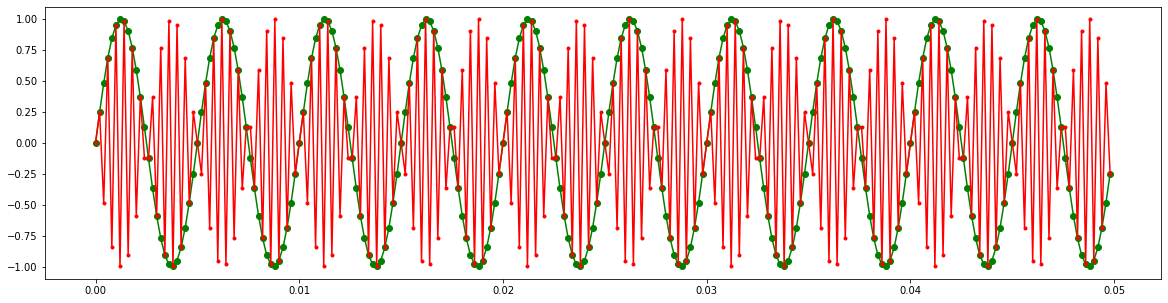

In [ ]:
t_st = 0
t_end = 0.05
f_01 = 200
f_02 = 2300

f_samp_01 = 5000

ts01 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_01), endpoint=False)
x01_ts01 = np.sin(2*np.pi*f_01*ts01)
x02_ts01 = np.sin(2*np.pi*f_02*ts01)

plt.figure(figsize=(20, 5))
plt.plot(ts01, x01_ts01, 'go-', ts01, x02_ts01, 'r.-')
plt.show()

The sampling rate is reduced to 2500 Hz (f_samp_02). Study and write a report to compare the results.



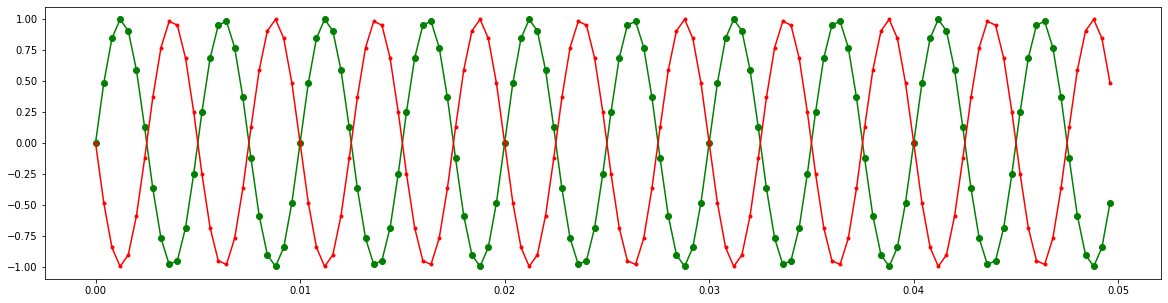

In [ ]:
f_samp_02 = 2500
ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)
x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)

plt.figure(figsize=(20, 5))
plt.plot(ts02, x01_ts02, 'go-', ts02, x02_ts02, 'r.-')
plt.show()

Ans.

### Problem 4.2
The following code generate audio signals at different frequencies. Play the sound and write a report the analyse the results.

In [ ]:
t_st = 0
t_end = 5
f_01 = 50
f_02 = 22050 - f_01
f_03 = 22050 + f_01
f_samp_02 = 22050

ts02 = np.linspace(t_st, t_end , int((t_end-t_st)*f_samp_02), endpoint=False)

# CREATE SIGNAL WITH DIFFERENT FREQ

x01_ts02 = np.sin(2*np.pi*f_01*ts02)
x02_ts02 = np.sin(2*np.pi*f_02*ts02)
x03_ts02 = np.sin(2*np.pi*f_03*ts02)

In [ ]:
x02_ts02

In [ ]:
ipd.Audio(x01_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x02_ts02, rate=f_samp_02)

In [ ]:
ipd.Audio(x03_ts02, rate=f_samp_02)



<a href="https://imgflip.com/i/4djx2z"><img src="https://i.imgflip.com/4djx2z.jpg" title="made at imgflip.com"/></a><div><a href="https://imgflip.com/memegenerator">from Imgflip Meme Generator</a></div>

###  TODO : write report
Ans:

### Problem 4.3
### why many of audio file use sampling rate 44.1 kHz


Ans:

### Problem 5
Download the 3 audio files and analyze all 3 signals with preliminary analysis.
(HINT : Use a log scale for both frequency and magnitude.)"

1. bass-guitar-single-note --> mixkit-bass-guitar-single-note-2331.wav

explain pattern of signal

In [ ]:
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-adult-sneeze-2212.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-child-deep-breath-2237.wav
!wget https://raw.githubusercontent.com/Pataweepr/ComEngMath2_2023_resource/master/mixkit-bass-guitar-single-note-2331.wav